In [1]:
# Plot target var
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

style.use('fivethirtyeight')

def plot_target(df,target):
    y= df[target]
    
    fig = plt.figure(constrained_layout=True,figsize=(15,8))
    grid = gridspec.GridSpec(ncols=3,nrows=3,figure=fig)
    
    # histogram
    ax1 = fig.add_subplot(grid[0,:])
    ax1.set_title('Histogram')
    sns.distplot(y,norm_hist=True,ax=ax1)
    
    #qq plot
    ax2 =fig.add_subplot(grid[1,:2])
    ax2.set_title('QQ Plot')
    scipy.stats.probplot(y,plot=ax2)
    
    # box plot
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Box Plot')
    sns.boxplot(y,orient='v',ax=ax3) 

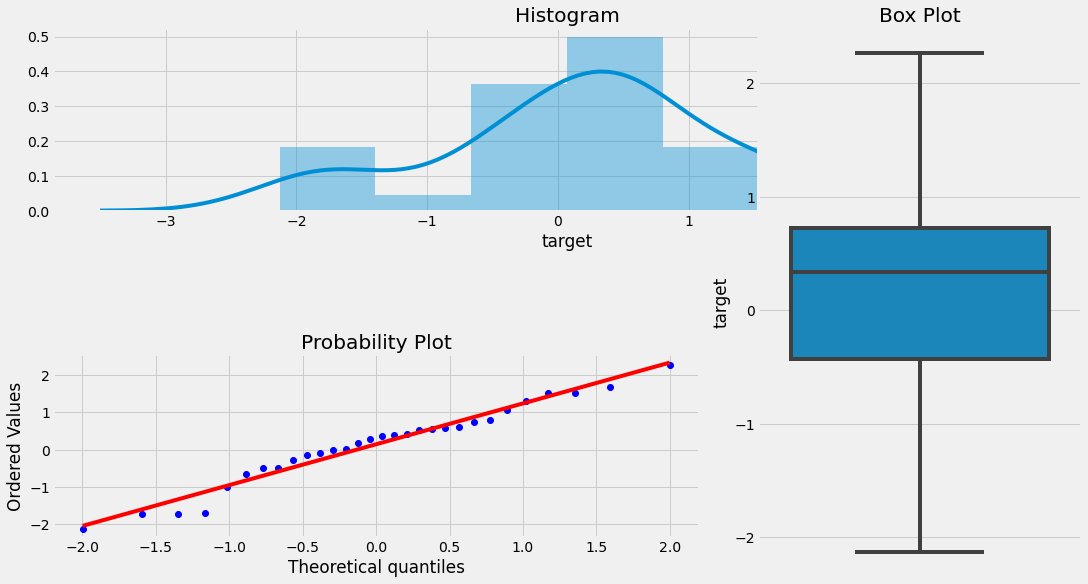

In [2]:
import numpy as np
import pandas as pd
y=np.random.normal(0, 1, 30)
y=pd.DataFrame(y,columns=['target'])
plot_target(y,target='target')

In [ ]:
import keras
import matplotlib.pyplot as plt

# plot keras history
def plot_history(history: keras.callbacks.History):
    """
    Plots Keras hisory
    """
    metrics = [metric for metric in history.history.keys() if not metric.startswith('val_')]
    stride = len(history.epoch)//20
    plotted_epochs = history.epoch[::stride]
    
    fig, subplots = plt.subplots(len(metrics), figsize=(8, 4*len(metrics)))
    subplots = subplots if len(metrics) != 1 else (subplots,)
    fig.tight_layout(h_pad=3, rect=[0, 0, 1, 0.95])
    fig.suptitle('Model training history', fontsize=18)
    
    for metric, subplot in zip(metrics, subplots):
        subplot.plot(plotted_epochs, history.history[metric][::stride], marker='.')
        try: subplot.plot(plotted_epochs, history.history[f'val_{metric}'], marker='.')
        except KeyError: pass
        subplot.set_xticks(plotted_epochs)
        subplot.set_ylabel(metric)
        subplot.set_xlabel('epoch')
    
    if len(metrics) != len(history.history):
        fig.legend(['training', 'validation'])

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns
    
# PLOT CORRELATIONS
def plot_chi2_heatmap(df, columns_to_compare):
    # columns_to_compare e.g. df.columns.values
    

    factors_paired = [(i, j) for i in columns_to_compare for j in columns_to_compare]

    chi2, p_values = [], []

    for f in factors_paired:
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(columns_to_compare),len(columns_to_compare)))  # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=columns_to_compare, columns=columns_to_compare)
    sns.heatmap(chi2)

In [ ]:
# downcast dataframe to save memory usage
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [ ]:
# perform TSNE
import pandas as pd
from sklearn.manifold import TSNE

def plot_tsne(X, y, perplexity=100, learning_rate=200, n_components=2):
    tsne = TSNE(n_components=n_components, init='random',
                random_state=None, perplexity=perplexity, verbose=1)
    result = tsne.fit_transform(X)
    result = pd.DataFrame(result)
    result = result.join(y)
    result.columns = ['x0', 'x1', 'y']
    sns.lmplot('x0', 'x1', result, fit_reg=False, hue='y', palette={0:"#2662c1", 1:"#c9001e"},
              scatter_kws={'alpha': .5})
    plt.title('t-SNE plot')
    plt.plot()

In [ ]:
def auto_dummies(df):
    """
    :param df: Pandas DataFrame
    :return: Pandas Dataframe()
    """
    return pd.get_dummies(df, columns=list(df.select_dtypes(include='category').columns), drop_first=True)

In [ ]:
def auto_remove_novariance(df):
    """
    :param df: Pandas DataFrame
    :return: Pandas DataFrame
    """
    uniques = df.apply(pd.Series.nunique)
    return df.drop(columns=list(uniques[uniques == 1].index))

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# get feature importance
def get_rf_feat_importances(X,y):
    rf = RandomForestClassifier(n_estimators=20, random_state = 42)
    rf.fit(X, y)
    df = pd.DataFrame(
        {'feature': X.columns, 'importance':rf.feature_importances_})
    df = df.sort_values(by=['importance'], ascending=False)
    return df

def plot_feature_importance_gbc(clf, feature_names, topk = 25, figsize = (50,70) ):
    #topk = 25
    fig = plt.figure(figsize = figsize)
    importances = clf.feature_importances_ 
    sorted_idx = np.argsort(importances)[-topk:]
    #sorted_idx = sorted_idx[::-1]
    padding = np.arange(len(sorted_idx)) + 0.5
    #plt.barh(padding, importances[sorted_idx], align='center')
    plt.barh(padding, importances[sorted_idx],\
       color="b", alpha = 0.5, align="center")    
    plt.tick_params(axis='y', which='major', labelsize=10)
    plt.yticks(padding, feature_names[sorted_idx])
    #plt.show()
    return fig

def plot_feature_importance(rf, feature_names, topk = 25, errorbar=False, figsize = (50,70) ):
    #topk = 25
    fig = plt.figure(figsize = figsize)
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)    
    sorted_idx = np.argsort(importances)[-topk:]
    padding = np.arange(len(sorted_idx)) + 0.5
    #plt.barh(padding, importances[sorted_idx], align='center')
    if errorbar: 
        plt.barh(padding, importances[sorted_idx],\
            color="b", alpha = 0.5, xerr=std[sorted_idx], align="center")   
    else:
        plt.barh(padding, importances[sorted_idx],\
        color="b", alpha = 0.5, align="center")  
    plt.tick_params(axis='y', which='major', labelsize=10)
    plt.yticks(padding, feature_names[sorted_idx])
    plt.show()
    #plt.plot()
    return fig

In [ ]:
# print False Postive and False Negative samples
def get_fp_fn_samples(test_y, test_y_pred, test_txt):

    i_lst_fp = [i for i in xrange(len(test_y)) if test_y[i] == 0 and test_y_pred[i] == 1]
    i_lst_fn = [i for i in xrange(len(test_y)) if test_y[i] == 1 and test_y_pred[i] == 0]
    print '\nfalse positive'
    for i in i_lst_fp[:20]:
        print i, test_y[i], ':', test_txt[i]
    print 'false negative'
    for i in i_lst_fn[:20]:
        print i, test_y[i], ':', test_txt[i]

In [ ]:
def remove_outliers(df, outlier_column_name, drop_anomalies=False, threshold=3):
    """
    Given a dataframe, remove outliers from a given column, according to some threshold.
    Return a dataframe.
    """
    from scipy.stats import zscore
    z_name = outlier_column_name + '_z'
    df[z_name] = df[[outlier_column_name]].apply(zscore)
    initial = df.shape[0]
    if drop_anomalies:
        df = df[(abs(df[z_name]) < threshold)]
        df = df.drop(z_name, axis=1)
        after = initial - df.shape[0]
        print(f"{after} outliers for {outlier_column_name} have been removed")
    return df


def remove_entries_outside_iq_range(df, col):
    q1 = df.diff_entry.quantile(0.25)
    q3 = df.diff_entry.quantile(0.75)
    iqr = q3 - q1
    iq_rem = df[~((df[col] < (q1 - iqr)) | (df[col] > (q3 + iqr)))]
    return iq_rem

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
from metrics_helper import get_confusion_rates
from scipy import interp


def plot_class_hist(data, target, feature, kde=False):
    """
    In a binary classification setting this function plots 
    two histograms of a given variable grouped by a class label.
    
    It is a wrapper around Seaborn's .distplot()
    
    Parameters:
    data    : name of your pd.DataFrame
    target  : name of a target column in data (string)
    feature : name of a feature column you want to plot (string)
    kde     : if you want to plot density estimation (boolean)
    (C) Aleksander Molak, 2018 MIT License || https://github.com/AlxndrMlk/
    """
    
    sns.distplot(data[data[target]==1][feature],\
                 label='1', color='#b71633', norm_hist=True, kde=kde)
    sns.distplot(data[data[target]==0][feature],\
                 label='0', color='#417adb', norm_hist=True, kde=kde)
    plt.ylabel('Frequency')
    plt.title(feature)
    plt.legend()
    plt.show()

def plot_roc(y, y_pred_prob):
    '''
    for binary classification
    '''
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % ( roc_auc))    

def plot_roc_cv(classifier, X, y, cv):
    '''
    cv = KFold(len(y),n_folds=5)
    '''
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

In [ ]:
"""KNN Imputer for Missing Data"""
# Author: Ashim Bhattarai
# License: GNU General Public License v3 (GPLv3)

import warnings

import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import FLOAT_DTYPES
from sklearn.neighbors.base import _check_weights
from sklearn.neighbors.base import _get_weights

from .pairwise_external import pairwise_distances
from .pairwise_external import _get_mask
from .pairwise_external import _MASKED_METRICS

__all__ = [
    'KNNImputer',
]


class KNNImputer(BaseEstimator, TransformerMixin):
    """Imputation for completing missing values using k-Nearest Neighbors.

    Each sample's missing values are imputed using values from ``n_neighbors``
    nearest neighbors found in the training set. Each missing feature is then
    imputed as the average, either weighted or unweighted, of these neighbors.
    Note that if a sample has more than one feature missing, then the
    neighbors for that sample can be different depending on the particular
    feature being imputed. Finally, where the number of donor neighbors is
    less than ``n_neighbors``, the training set average for that feature is
    used during imputation.

    Parameters
    ----------
    missing_values : integer or "NaN", optional (default = "NaN")
        The placeholder for the missing values. All occurrences of
        `missing_values` will be imputed. For missing values encoded as
        ``np.nan``, use the string value "NaN".

    n_neighbors : int, optional (default = 5)
        Number of neighboring samples to use for imputation.

    weights : str or callable, optional (default = "uniform")
        Weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weights.

    metric : str or callable, optional (default = "masked_euclidean")
        Distance metric for searching neighbors. Possible values:
        - 'masked_euclidean'
        - [callable] : a user-defined function which conforms to the
        definition of _pairwise_callable(X, Y, metric, **kwds). In other
        words, the function accepts two arrays, X and Y, and a
        ``missing_values`` keyword in **kwds and returns a scalar distance
        value.

    row_max_missing : float, optional (default = 0.5)
        The maximum fraction of columns (i.e. features) that can be missing
        before the sample is excluded from nearest neighbor imputation. It
        means that such rows will not be considered a potential donor in
        ``fit()``, and in ``transform()`` their missing feature values will be
        imputed to be the column mean for the entire dataset.

    col_max_missing : float, optional (default = 0.8)
        The maximum fraction of rows (or samples) that can be missing
        for any feature beyond which an error is raised.

    copy : boolean, optional (default = True)
        If True, a copy of X will be created. If False, imputation will
        be done in-place whenever possible. Note that, if metric is
        "masked_euclidean" and copy=False then missing_values in the
        input matrix X will be overwritten with zeros.

    Attributes
    ----------
    statistics_ : 1-D array of length {n_features}
        The 1-D array contains the mean of each feature calculated using
        observed (i.e. non-missing) values. This is used for imputing
        missing values in samples that are either excluded from nearest
        neighbors search because they have too many ( > row_max_missing)
        missing features or because all of the sample's k-nearest neighbors
        (i.e., the potential donors) also have the relevant feature value
        missing.

    References
    ----------
    * Olga Troyanskaya, Michael Cantor, Gavin Sherlock, Pat Brown, Trevor
      Hastie, Robert Tibshirani, David Botstein and Russ B. Altman, Missing
      value estimation methods for DNA microarrays, BIOINFORMATICS Vol. 17
      no. 6, 2001 Pages 520-525.

    Examples
    --------
    >>> from missingpy import KNNImputer
    >>> nan = float("NaN")
    >>> X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
    >>> imputer = KNNImputer(n_neighbors=2, weights="uniform")
    >>> imputer.fit_transform(X)
    array([[1. , 2. , 4. ],
           [3. , 4. , 3. ],
           [5.5, 6. , 5. ],
           [8. , 8. , 7. ]])
    """

    def __init__(self, missing_values="NaN", n_neighbors=5,
                 weights="uniform", metric="masked_euclidean",
                 row_max_missing=0.5, col_max_missing=0.8, copy=True):

        self.missing_values = missing_values
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.row_max_missing = row_max_missing
        self.col_max_missing = col_max_missing
        self.copy = copy

    def _impute(self, dist, X, fitted_X, mask, mask_fx):
        """Helper function to find and impute missing values"""

        # For each column, find and impute
        n_rows_X, n_cols_X = X.shape
        for c in range(n_cols_X):
            if not np.any(mask[:, c], axis=0):
                continue

            # Row index for receivers and potential donors (pdonors)
            receivers_row_idx = np.where(mask[:, c])[0]
            pdonors_row_idx = np.where(~mask_fx[:, c])[0]

            # Impute using column mean if n_neighbors are not available
            if len(pdonors_row_idx) < self.n_neighbors:
                warnings.warn("Insufficient number of neighbors! "
                              "Filling in column mean.")
                X[receivers_row_idx, c] = self.statistics_[c]
                continue

            # Get distance from potential donors
            dist_pdonors = dist[receivers_row_idx][:, pdonors_row_idx]
            dist_pdonors = dist_pdonors.reshape(-1,
                                                len(pdonors_row_idx))

            # Argpartition to separate actual donors from the rest
            pdonors_idx = np.argpartition(
                dist_pdonors, self.n_neighbors - 1, axis=1)

            # Get final donors row index from pdonors
            donors_idx = pdonors_idx[:, :self.n_neighbors]

            # Get weights or None
            dist_pdonors_rows = np.arange(len(donors_idx))[:, None]
            weight_matrix = _get_weights(
                dist_pdonors[
                    dist_pdonors_rows, donors_idx], self.weights)
            donor_row_idx_ravel = donors_idx.ravel()

            # Retrieve donor values and calculate kNN score
            fitted_X_temp = fitted_X[pdonors_row_idx]
            donors = fitted_X_temp[donor_row_idx_ravel, c].reshape(
                (-1, self.n_neighbors))
            donors_mask = _get_mask(donors, self.missing_values)
            donors = np.ma.array(donors, mask=donors_mask)

            # Final imputation
            imputed = np.ma.average(donors, axis=1,
                                    weights=weight_matrix)
            X[receivers_row_idx, c] = imputed.data
        return X

    def fit(self, X, y=None):
        """Fit the imputer on X.

        Parameters
        ----------
        X : {array-like}, shape (n_samples, n_features)
            Input data, where ``n_samples`` is the number of samples and
            ``n_features`` is the number of features.

        Returns
        -------
        self : object
            Returns self.
        """

        # Check data integrity and calling arguments
        force_all_finite = False if self.missing_values in ["NaN",
                                                            np.nan] else True
        if not force_all_finite:
            if self.metric not in _MASKED_METRICS and not callable(
                    self.metric):
                raise ValueError(
                    "The selected metric does not support NaN values.")
        X = check_array(X, accept_sparse=False, dtype=np.float64,
                        force_all_finite=force_all_finite, copy=self.copy)
        self.weights = _check_weights(self.weights)

        # Check for +/- inf
        if np.any(np.isinf(X)):
            raise ValueError("+/- inf values are not allowed.")

        # Check if % missing in any column > col_max_missing
        mask = _get_mask(X, self.missing_values)
        if np.any(mask.sum(axis=0) > (X.shape[0] * self.col_max_missing)):
            raise ValueError("Some column(s) have more than {}% missing values"
                             .format(self.col_max_missing * 100))
        X_col_means = np.ma.array(X, mask=mask).mean(axis=0).data

        # Check if % missing in any row > row_max_missing
        bad_rows = mask.sum(axis=1) > (mask.shape[1] * self.row_max_missing)
        if np.any(bad_rows):
            warnings.warn(
                "There are rows with more than {0}% missing values. These "
                "rows are not included as donor neighbors."
                    .format(self.row_max_missing * 100))

            # Remove rows that have more than row_max_missing % missing
            X = X[~bad_rows, :]

        # Check if sufficient neighboring samples available
        if X.shape[0] < self.n_neighbors:
            raise ValueError("There are only %d samples, but n_neighbors=%d."
                             % (X.shape[0], self.n_neighbors))
        self.fitted_X_ = X
        self.statistics_ = X_col_means

        return self

    def transform(self, X):
        """Impute all missing values in X.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            The input data to complete.

        Returns
        -------
        X : {array-like}, shape = [n_samples, n_features]
            The imputed dataset.
        """

        check_is_fitted(self, ["fitted_X_", "statistics_"])
        force_all_finite = False if self.missing_values in ["NaN",
                                                            np.nan] else True
        X = check_array(X, accept_sparse=False, dtype=FLOAT_DTYPES,
                        force_all_finite=force_all_finite, copy=self.copy)

        # Check for +/- inf
        if np.any(np.isinf(X)):
            raise ValueError("+/- inf values are not allowed in data to be "
                             "transformed.")

        # Get fitted data and ensure correct dimension
        n_rows_fit_X, n_cols_fit_X = self.fitted_X_.shape
        n_rows_X, n_cols_X = X.shape

        if n_cols_X != n_cols_fit_X:
            raise ValueError("Incompatible dimension between the fitted "
                             "dataset and the one to be transformed.")
        mask = _get_mask(X, self.missing_values)

        row_total_missing = mask.sum(axis=1)
        if not np.any(row_total_missing):
            return X

        # Check for excessive missingness in rows
        bad_rows = row_total_missing > (mask.shape[1] * self.row_max_missing)
        if np.any(bad_rows):
            warnings.warn(
                "There are rows with more than {0}% missing values. The "
                "missing features in these rows are imputed with column means."
                    .format(self.row_max_missing * 100))
            X_bad = X[bad_rows, :]
            X = X[~bad_rows, :]
            mask = mask[~bad_rows]
            row_total_missing = mask.sum(axis=1)
        row_has_missing = row_total_missing.astype(np.bool)

        if np.any(row_has_missing):

            # Mask for fitted_X
            mask_fx = _get_mask(self.fitted_X_, self.missing_values)

            # Pairwise distances between receivers and fitted samples
            dist = np.empty((len(X), len(self.fitted_X_)))
            dist[row_has_missing] = pairwise_distances(
                X[row_has_missing], self.fitted_X_, metric=self.metric,
                squared=False, missing_values=self.missing_values)

            # Find and impute missing
            X = self._impute(dist, X, self.fitted_X_, mask, mask_fx)

        # Merge bad rows to X and mean impute their missing values
        if np.any(bad_rows):
            bad_missing_index = np.where(_get_mask(X_bad, self.missing_values))
            X_bad[bad_missing_index] = np.take(self.statistics_,
                                               bad_missing_index[1])
            X_merged = np.empty((n_rows_X, n_cols_X))
            X_merged[bad_rows, :] = X_bad
            X_merged[~bad_rows, :] = X
            X = X_merged
        return X

    def fit_transform(self, X, y=None, **fit_params):
        """Fit KNNImputer and impute all missing values in X.

        Parameters
        ----------
        X : {array-like}, shape (n_samples, n_features)
            Input data, where ``n_samples`` is the number of samples and
            ``n_features`` is the number of features.

        Returns
        -------
        X : {array-like}, shape (n_samples, n_features)
            Returns imputed dataset.
        """
        return self.fit(X).transform(X)
